# Introduction

Herein, I will be analysing some data collected throughout the decades in regards to Olympic medals. In addition, I will be doing some data visualization.

In [17]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,15))
#autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
#Load the data
data_dict = pd.read_csv('./data/raw/dictionary.csv')
data_summer = pd.read_csv('./data/raw/summer.csv')
data_winter = pd.read_csv('./data/raw/winter.csv')


## Aim of the data analysis

1. We will want to acquire a thorough understanding on how the Olympic medal are distribute by country and sport. 
2. We also want to check the countries' evolution throughout the years 
3. Correlation between GDP and GDP per capita with medals 

### 1. Summer Olympics analysis

Let's have a overall look at the data and its features

In [19]:
data_summer.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


We can see the data is ordered by year, gender. Let's look at the end of the data to see the sport are alphabetically ordered.

In [20]:
data_summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [21]:
data_summer.tail(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31155,2012,London,Wrestling,Wrestling Freestyle,"AHMADOV, Emin",AZE,Men,Wg 74 KG,Bronze
31156,2012,London,Wrestling,Wrestling Freestyle,"KAZAKEVIC, Aleksandr",LTU,Men,Wg 74 KG,Bronze
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold
31158,2012,London,Wrestling,Wrestling Freestyle,"EBRAHIM, Karam Mohamed Gaber",EGY,Men,Wg 84 KG,Silver
31159,2012,London,Wrestling,Wrestling Freestyle,"GAJIYEV, Danyal",KAZ,Men,Wg 84 KG,Bronze
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


Yes, sport are alphabetically ordered. Therefore, we can get some insights from this previous analysis and knowledge. Let's check if there is any missing data.

In [22]:
data_summer.tail(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31155,2012,London,Wrestling,Wrestling Freestyle,"AHMADOV, Emin",AZE,Men,Wg 74 KG,Bronze
31156,2012,London,Wrestling,Wrestling Freestyle,"KAZAKEVIC, Aleksandr",LTU,Men,Wg 74 KG,Bronze
31157,2012,London,Wrestling,Wrestling Freestyle,"KHUGAEV, Alan",RUS,Men,Wg 84 KG,Gold
31158,2012,London,Wrestling,Wrestling Freestyle,"EBRAHIM, Karam Mohamed Gaber",EGY,Men,Wg 84 KG,Silver
31159,2012,London,Wrestling,Wrestling Freestyle,"GAJIYEV, Danyal",KAZ,Men,Wg 84 KG,Bronze
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


In [23]:
data_summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


Apparently, there are 4 missing data on the country field. We will assign those country as Independent Olympic Athletes (IOA), as many athltes compete under this flag due to political issues between associations.

Let's first check whether we have country registered

In [24]:
data_summer.loc[data_summer['Country'] == 'IOA']

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal


Seems that there are no data from this country. Given the significant size of data missing compared to the total amount of entries (i.e. 4 vs 31165), we can Insert IOA for those medals.

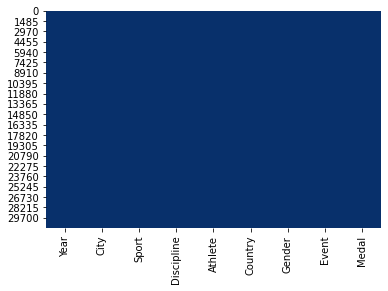

In [25]:
data_summer["Country"].fillna("IOA", inplace=True)
sns.heatmap(data_summer.isnull(), cbar=False, cmap='Blues_r')

Great! Now it seems that we do not have any missing data. We can start analysing the data.

Let's have a look at simple trends and data.

#### 1.1. Evolution of number of sports competed over the year

Here we will see how many sports have been introduced over the year.

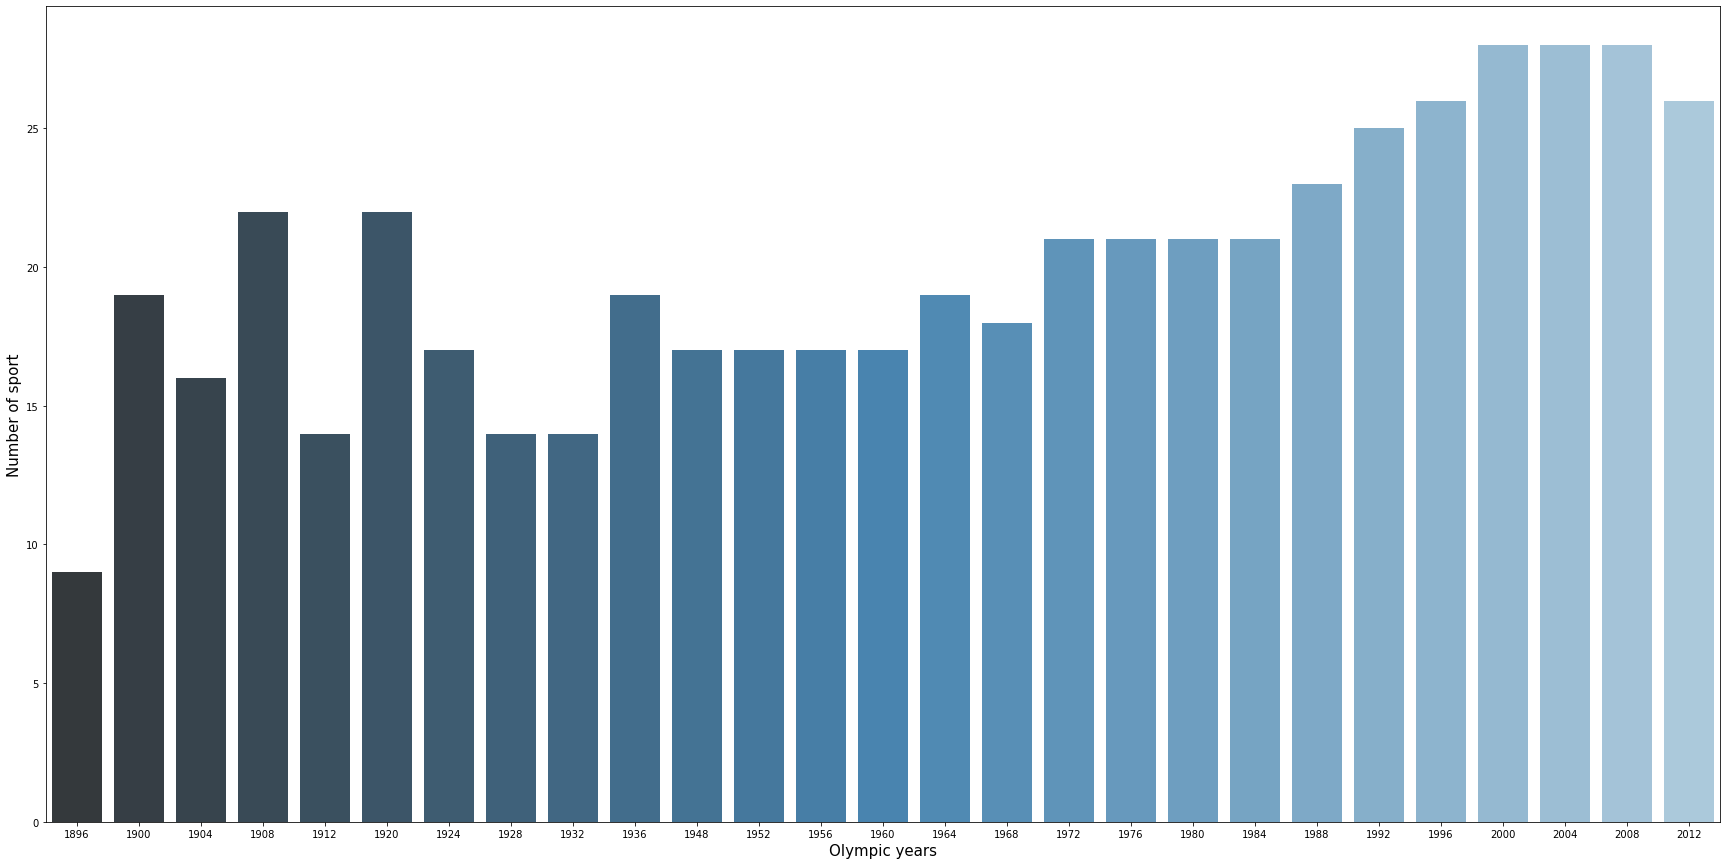

In [26]:
plt.figure(figsize=(30,15))
sns.barplot(y=data_summer.groupby('Year')['Sport'].nunique(),x=data_summer['Year'].unique(), data=data_summer, palette='Blues_d')
plt.ylabel('Number of sport', fontsize=15)
plt.xlabel('Olympic years', fontsize=15)
plt.show()

Although there is a variation along the year, it seems that the number of sports included in the Olympic games has increased. Interestingly, the year 1908 and 1920 had surprisingly close number compared to very recent editions. 

####  1.2. Gender evolution

Let's see the women participation compared to men in the medals table. We can do this by pivoting the table in terms of year and gender to get the total amount of medal for each gender.

In [37]:
#Lets creat a pivot table that havee year and gender as main hiera
subset = pd.pivot_table(data_summer, index= ['Year', 'Gender'], values = 'Medal', aggfunc='count').reset_index()
subset

,Year,Gender,Medal
0,1896,Men,151
1,1900,Men,501
2,1900,Women,11
3,1904,Men,458
4,1904,Women,12
5,1908,Men,789
6,1908,Women,15
7,1912,Men,855
8,1912,Women,30
9,1920,Men,1255


In [38]:
# We need to add the row women in 1986 since the result is 0 medals
subset = subset.append({'Year': 1896, 'Gender': 'Women', 'Medal': 0}, 
        ignore_index=True).sort_values(by='Year', ascending=True).reset_index(drop=True)
subset

,Year,Gender,Medal
0,1896,Men,151
1,1896,Women,0
2,1900,Women,11
3,1900,Men,501
4,1904,Women,12
5,1904,Men,458
6,1908,Men,789
7,1908,Women,15
8,1912,Men,855
9,1912,Women,30


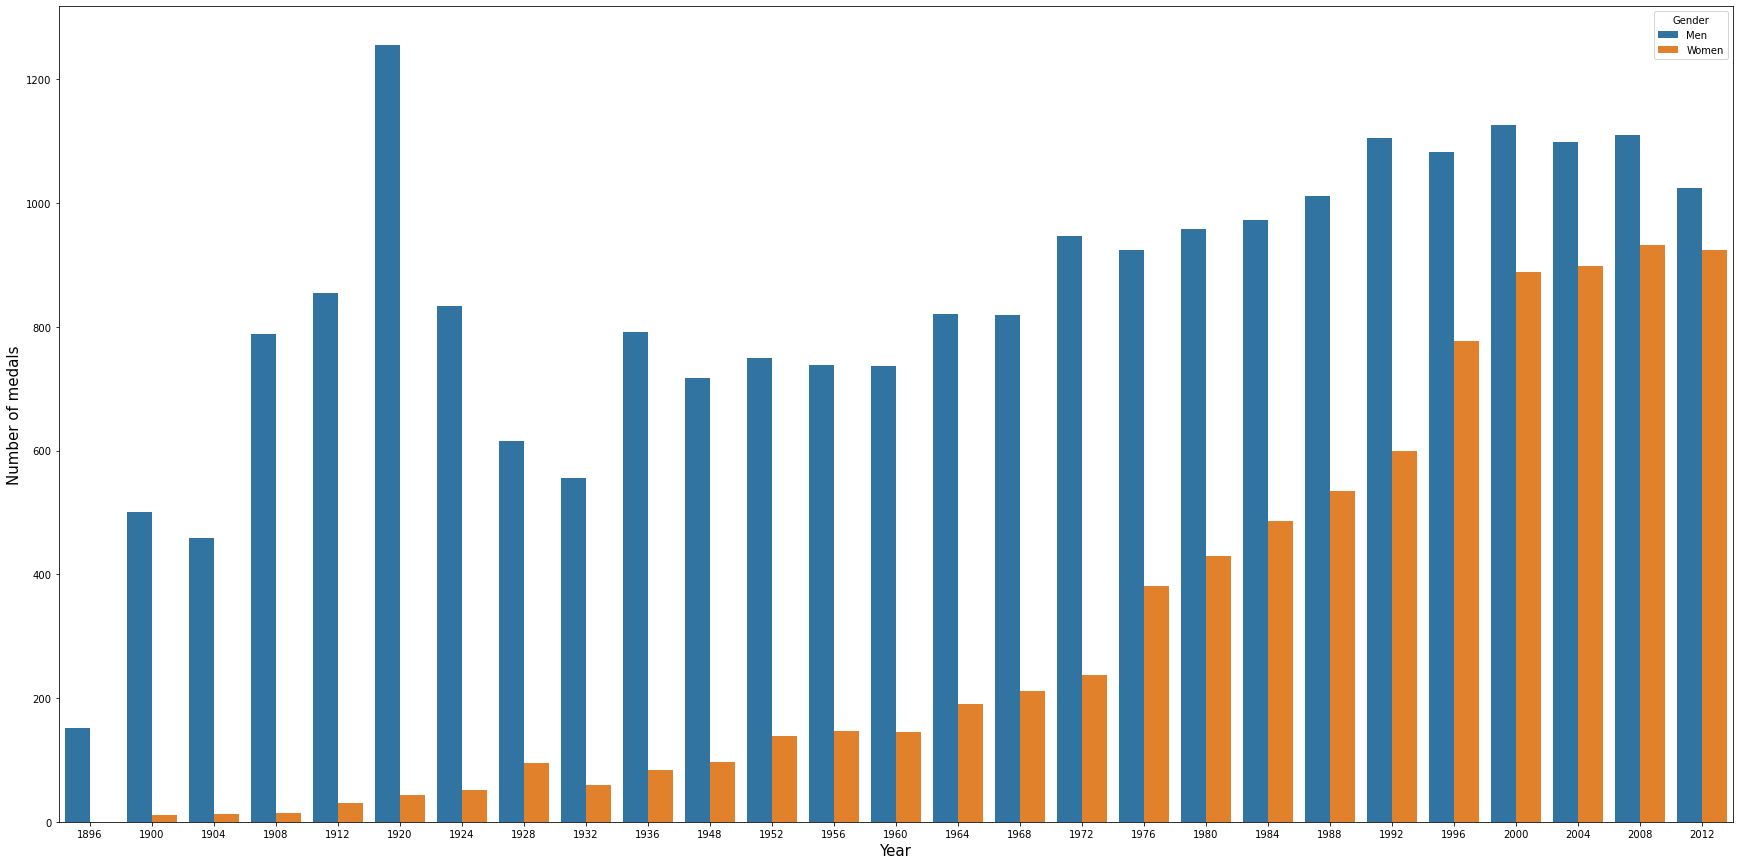

In [44]:
#Let's plot this to better visualization
plt.figure(figsize=(30,15))
ax = sns.barplot('Year', 'Medal', hue='Gender', data=subset)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of medals', fontsize=15)
plt.show()

Interestingly, the first modern olympic games there were no women's competition. However, it is good to see that the gender ratio of participation is almost 50/50 nowadays. Good to see that women have gained her way into the sport world (finally!!). Still, until 1960 there were minimal amount of women competing in the summer olympics.

#### 1.3. Geographic Analysis

Herein, we will be doing some geographic analysis and correlation with GDP

In [42]:
data_summer.head(10)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
5,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200M Freestyle,Bronze
6,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold
7,1896,Athens,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200M Freestyle,Silver
8,1896,Athens,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400M Freestyle,Bronze
9,1896,Athens,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400M Freestyle,Gold


Let's see how many olympic games have ever been and how many hosts.

In [48]:
data_summer['Year'].nunique()

27

In [49]:
data_summer['City'].nunique()

22

It seems that some city have hosted the games more then once. Let's find those cities.

In [69]:
pd.pivot_table(data_summer, index='City', values='Year', aggfunc=lambda x: len(x.unique()))

,Year
City,
Amsterdam,1
Antwerp,1
Athens,2
Atlanta,1
Barcelona,1
Beijing,1
Berlin,1
Helsinki,1
London,3


Great!! Just 4 cities have hosted more than once the games, with london leading with 3 hosts.

Now, we will check the number of medal per contry.

In [75]:
country_medals = pd.pivot_table(data_summer, index='Country', 
                                values='Medal', aggfunc='count').sort_values('Medal', ascending=False)
country_medals.head(10)

,Medal
Country,
USA,4585
URS,2049
GBR,1720
FRA,1396
GER,1305
ITA,1296
AUS,1189
HUN,1079
SWE,1044


Interesting, USA have more medals than double of URS. Also, 8 of the top 10 countries are from Europe.

In [76]:
country_medals.tail(10)

,Medal
Country,
TOG,1
IRQ,1
TGA,1
ISV,1
AHO,1
MKD,1
SUD,1
MRI,1
NIG,1


On the other hand, the bottom of the latter are majority from middle east or africa.

Let's associate it to GDP per capita

In [78]:
country_medals.reset_index()

,Country,Medal
0,USA,4585
1,URS,2049
2,GBR,1720
3,FRA,1396
4,GER,1305
...,...,...
143,MKD,1
144,SUD,1
145,MRI,1
146,NIG,1


In [79]:
data_dict.head(10)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
5,Angola,ANG,25021974.0,4101.472152
6,Antigua and Barbuda,ANT,91818.0,13714.731962
7,Argentina,ARG,43416755.0,13431.878340
8,Armenia,ARM,3017712.0,3489.127690
9,Aruba*,ARU,103889.0,NaN


In [91]:
#We can concat country_medal to data_dict by contry code
country_gdp = pd.merge(country_medals, data_dict, left_on='Country', 
                right_on="Code").sort_values('GDP per Capita', 
                ascending=False).reset_index(drop=True)
country_gdp.head(10)

,Medal,Country,Code,Population,GDP per Capita
0,2,Luxembourg,LUX,569676.0,101449.968168
1,380,Switzerland,SUI,8286976.0,80945.079219
2,554,Norway,NOR,5195921.0,74400.369777
3,4,Qatar,QAT,2235355.0,73653.394435
4,30,Ireland,IRL,4640703.0,61133.672427
5,1189,Australia,AUS,23781169.0,56310.962993
6,4585,United States,USA,321418820.0,56115.718426
7,4,Singapore,SIN,5535002.0,52888.744672
8,507,Denmark,DEN,5676002.0,51989.293471
9,1044,Sweden,SWE,9798871.0,50579.673649


Interesting, the highest GDP per capita does not guarantee sucess on sport. Indeed, the government might invest more in welfare structure rather than sport. There are only three countries that make the top 10 for both ranks: USA, Australia and Sweden.

Let's have a look the bottom end.

In [92]:
country_gdp.tail(10)

,Medal,Country,Code,Population,GDP per Capita
119,61,Iran,IRI,79109272.0,NaN
120,58,"Korea, North",PRK,25155317.0,NaN
121,44,Taiwan,TPE,NaN,NaN
122,12,Venezuela,VEN,31108083.0,NaN
123,8,Puerto Rico*,PUR,3474182.0,NaN
124,3,Syria,SYR,18502413.0,NaN
125,1,Bermuda*,BER,65235.0,NaN
126,1,Eritrea,ERI,NaN,NaN
127,1,Virgin Islands*,ISV,103574.0,NaN
128,1,Netherlands Antilles*,AHO,NaN,NaN


That's actually data missing for these contries so no conclusion can be made.

## 2. Winter Olympics

Now that we have looked the summer olympics